#### Import necessary libraries

In [62]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

### Task #1 - Merging 12 months data

In [10]:
path = r'.\Sales_Data'
all_files = glob.glob(os.path.join(path , "*.csv"))
li = []
for filename in all_files:
    df_temp = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_temp)

df = pd.concat(li, axis=0, ignore_index=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [12]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Variant #2

In [25]:
files = [file for file in os.listdir('.\Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    #print(file)
    df2 = pd.read_csv(".\Sales_Data\\"+ file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("all_sales_data.csv", index=False)

In [31]:
all_data = pd.read_csv('all_sales_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Clean up the Data

In [46]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2240525,NaN,NaN,NaN,NaN,NaN,NaN
2240787,NaN,NaN,NaN,NaN,NaN,NaN
2241391,NaN,NaN,NaN,NaN,NaN,NaN
2241897,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
all_data = all_data.dropna(how='all')
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Find any wrong data and delete

In [49]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert data type

In [54]:
#all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
#all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [55]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2231400 entries, 0 to 2242198
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Order ID          object 
 1   Product           object 
 2   Quantity Ordered  int32  
 3   Price Each        float64
 4   Order Date        object 
 5   Purchase Address  object 
 6   Month             int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 119.2+ MB


## Question 1 - What was the best month for sales? How much was earned that month?

### Task #2 - Add month column

In [50]:
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task #3 - Add sales column

In [77]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [78]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [45]:
#all_data.loc[all_data["Quantity Ordered"] == NaN, "Quantity Ordered"] = 0
#all_data.replace(NaN, 0)
#data_types_dict = {'Quantity Ordered': int}
#all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(float)
#all_data = all_data.astype(data_types_dict)
#all_data.info()

### Answer #1

In [79]:
all_data.groupby('Month').sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,337368,5.506098e+07,5.536132e+07
10,272436,4.458666e+07,4.484072e+07
4,246696,4.041205e+07,4.068804e+07
11,237576,3.816721e+07,3.839524e+07
5,224004,3.762150e+07,3.783128e+07
3,204060,3.349449e+07,3.368520e+07
7,192864,3.159047e+07,3.177331e+07
6,183036,3.074431e+07,3.093363e+07
8,161376,2.676415e+07,2.693361e+07


In [66]:
results = all_data.groupby('Month').sum()

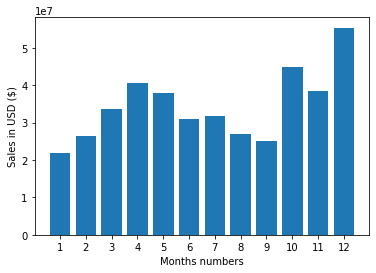

In [70]:
months_nums = range(1, 13)
plt.bar(months_nums, results['Sales'])
plt.xticks(months_nums)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months numbers')
plt.show()

## Question 2 - What city had the best sales?

### Task #4 - Add City column

In [90]:
all_data['City Sales'] = all_data['Purchase Address'].str.split(',',expand=True)[1] + all_data['Purchase Address'].str.split(',',expand=True)[2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


In [91]:
all_data.groupby('City Sales').sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City Sales,,,,
San Francisco CA 94016,602868,9.853754e+07,3786240,9.914645e+07
Los Angeles CA 90001,399468,6.505722e+07,2499900,6.543085e+07
New York City NY 10001,335184,5.562445e+07,2108892,5.597181e+07
Boston MA 02215,270336,4.364892e+07,1693344,4.393970e+07
Atlanta GA 30301,199224,3.335890e+07,1257528,3.354598e+07
Dallas TX 75001,200760,3.303153e+07,1255440,3.321570e+07
Seattle WA 98101,198636,3.279955e+07,1259292,3.297307e+07
Portland OR 97035,135636,2.232670e+07,847452,2.244879e+07
Austin TX 73301,133836,2.171848e+07,837948,2.183498e+07


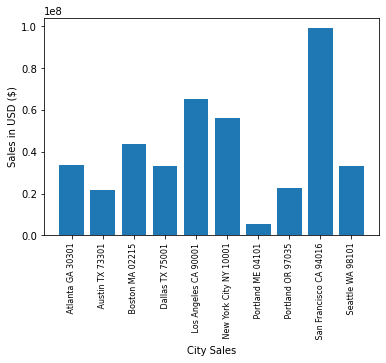

In [95]:
results2 = all_data.groupby('City Sales').sum()
#cities = all_data['City Sales'].unique() 
cities = [city for city, df in all_data.groupby('City Sales')]
plt.bar(cities, results2['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Sales')
plt.show()

## Question 3 - Which the best time for Ad?

In [106]:
#all_data['Time Sales'] = all_data['Order Date'].str.split(' ',expand=True)[1]
#all_data = all_data.drop(columns='Time Sales')
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


In [107]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,9,27


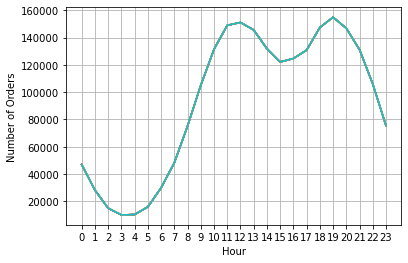

In [110]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
#all_data.groupby(['Hour']).count()
plt.show()

## Question 4 - What products are most often sold together?

In [116]:
results3 = all_data['Order Date'].unique() 
results3.len()

AttributeError: 'numpy.ndarray' object has no attribute 'len'